In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
plt.style.use('seaborn-whitegrid')
import seaborn as sns

sns.set(style='whitegrid', palette='Set2')

pd.options.mode.chained_assignment = None

In [2]:
pns1 = pd.read_csv('dados/pns.csv') # pns 2013
pns2 = pns1.query('idade > 17') # incluir apenas quem já poderia ter concluído o ensino médio
pns3 = pns2.query('freq_esc == 2') # apenas quem não frequenta mais a escola
pns4 = pns3.query('escolaridade == [3, 5]') # apenas os dois níveis de escolaridade
linha_vazia = pd.DataFrame([np.nan]).T

pns5 = pns4.query('rendimento > 0') # rendimento maior do que 0

print(' início: ', pns1.shape[0], '\n',
      'idade > 17: ', pns2.shape[0], '\n',
      'não frequenta a escola: ', pns3.shape[0], '\n',
      'fundamental ou médio: ', pns4.shape[0], '\n',
      'rendimento > 0: ', pns5.shape[0])

 início:  205546 
 idade > 17:  145580 
 não frequenta a escola:  129926 
 fundamental ou médio:  51155 
 rendimento > 0:  34479


### Escolaridade da população

In [4]:
pns3.escolaridade = pns3.escolaridade.replace([4, 6], [3, 5]) # juntando incompleto c/ completo
pns3['escolaridade'] = pns3.escolaridade.astype('category')
pns3.escolaridade.cat.rename_categories(['uneducated', 'inc. elementary school', 'elementary school', 'high school', 'higher education'], inplace=True)
pns3.escolaridade.cat.as_ordered(inplace=True)

In [6]:
esc = (pns3.escolaridade.value_counts(normalize=True)*100).round(1)
esc = pd.DataFrame(esc).reset_index().iloc[[2, 1, 3, 0, 4]]
esc.columns = ['level of education', '%']
esc

,level of education,%
2,uneducated,16.1
1,inc. elementary school,25.1
3,elementary school,14.2
0,high school,31.8
4,higher education,12.8


### **Analisando apenas quem tem ensino fundamental e/ou médio:**

### Percepção

In [8]:
pns4['percepcao'] = pns4.percepcao.astype('category')
pns4.percepcao = pns4.percepcao.cat.rename_categories(['very good', 'good', 'regular', 'bad',
                                                       'very bad'])

In [9]:
pns4['escolaridade'] = pns4.escolaridade.astype('category')
pns4.escolaridade = pns4.escolaridade.cat.rename_categories(['elementary school', 'high school'])

In [10]:
pns4.percepcao.value_counts(normalize=True)* 100

good         62.379044
regular      22.113185
very good    12.305737
bad           2.676180
very bad      0.525853
Name: percepcao, dtype: float64

#### Percepção de acordo com a escolaridade

In [11]:
percepcao = pd.crosstab(pns4.escolaridade, pns4.percepcao, normalize = 'index').round(3) * 100
percepcao

percepcao,very good,good,regular,bad,very bad
escolaridade,,,,,
elementary school,9.2,57.3,28.4,4.2,0.9
high school,13.3,64.0,20.0,2.2,0.4


In [12]:
percepcao = percepcao.loc[['elementary school', 'high school'],:]

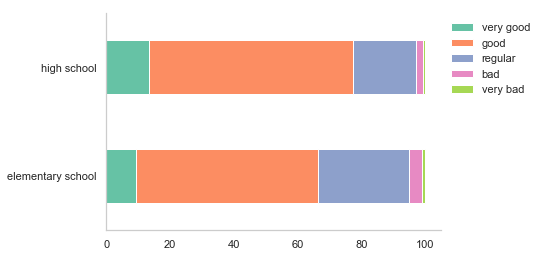

In [15]:
percepcao.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.grid(False) # tira as linhas de grade
sns.despine() # tira os eixos da parte de cima e da direita
plt.ylabel('');
plt.savefig('imagens-ingles/saude-escolaridade.jpg', bbox_inches = 'tight');

### Sexo

In [16]:
pns4['sexo'] = pns4.sexo.astype('category')
pns4.sexo = pns4.sexo.cat.rename_categories(['male', 'female'])

In [17]:
round(pns4.sexo.value_counts(normalize = True) * 100), 2

(female    53.0
 male      47.0
 Name: sexo, dtype: float64, 2)

#### Percepção de acordo com o sexo

- deveríamos fazer o gráfico só com duas variáveis (bom e ruim) igual ao modelo de regressão?

In [50]:
sexo = pd.crosstab(pns4.sexo, pns4.percepcao, normalize = 'index').round(3) * 100
sexo2 = sexo.reindex(['female', 'male'])
sexo2

percepcao,very good,good,regular,bad,very bad
sexo,,,,,
female,11.1,60.6,24.5,3.1,0.6
male,13.7,64.4,19.4,2.2,0.4


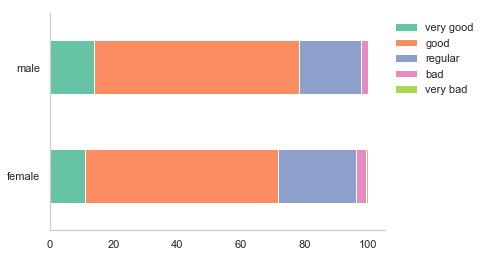

In [51]:
sexo2.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.grid(False) # tira as linhas de grade
sns.despine() # tira os eixos da parte de cima e da direita
plt.ylabel('')
plt.savefig('imagens-ingles/saude-sexo.png', bbox_inches='tight');

### Escolaridade

In [20]:
pns4.escolaridade.value_counts(normalize = True) * 100

high school          75.210634
elementary school    24.789366
Name: escolaridade, dtype: float64

In [21]:
escolaridade = pd.crosstab(pns4.percepcao, pns4.escolaridade, normalize = 'index').round(2) * 100
escolaridade

escolaridade,elementary school,high school
percepcao,,
very good,19.0,81.0
good,23.0,77.0
regular,32.0,68.0
bad,39.0,61.0
very bad,40.0,60.0


In [22]:
escolaridade2 = pd.crosstab(pns4.escolaridade, pns4.percepcao, normalize = 'index').round(2) * 100
escolaridade2

percepcao,very good,good,regular,bad,very bad
escolaridade,,,,,
elementary school,9.0,57.0,28.0,4.0,1.0
high school,13.0,64.0,20.0,2.0,0.0


In [18]:
escolaridade = escolaridade.loc[['muito bom', 'bom', 'regular', 'ruim', 'muito ruim'],:]

- Havíamos pensado em usar esse gráfico, mas não faz sentido.

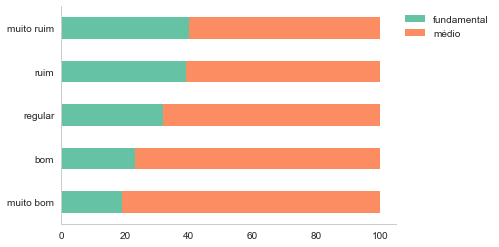

In [19]:
escolaridade.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.grid(False) # tira as linhas de grade
sns.despine() # tira os eixos da parte de cima e da direita
plt.ylabel('');

### Tabela descritiva

In [20]:
rendimento = (pns4.groupby('escolaridade').rendimento.describe(percentiles=[.5]).astype(int).T.iloc[1:, :])
rendimento.index = ['média', 'desvio padrão', 'mínimo', 'mediana', 'máximo']

idade = pns4.groupby('escolaridade').idade.describe(percentiles=[.5]).round(1).T.iloc[1:, :]
idade.index = ['média', 'desvio padrão', 'mínimo', 'mediana', 'máximo']
idade = pd.concat([linha_vazia, idade])

sexo = pd.crosstab(pns4.sexo, pns4.escolaridade, normalize='columns').round(2) * 100
sexo = pd.concat([linha_vazia, sexo])
sexo = sexo.loc[['masculino', 'feminino']]

percepcao = pd.crosstab(pns4.percepcao, pns4.escolaridade, normalize='columns').round(3) * 100
percepcao = pd.concat([linha_vazia, percepcao])
percepcao = percepcao.loc[['muito bom', 'bom', 'regular', 'ruim', 'muito ruim']]
percepcao

resumo1 = (pd.concat([sexo, idade, rendimento, percepcao], 
                    keys=['Sexo', 'Idade', 'Rendimento', 'Percepção'])
                   .drop(0, axis=1))
resumo1.columns = ['Ensino fundamental', 'Ensino médio']
resumo1

C:\Users\ledag\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


Ensino fundamental  Ensino médio
Sexo       masculino                    50.0          46.0
           feminino                     50.0          54.0
Idade      0                             NaN           NaN
           média                        41.4          37.1
           desvio padrão                15.5          13.9
           mínimo                       18.0          18.0
           mediana                      40.0          34.0
           máximo                       99.0         105.0
Rendimento média                      1169.0        1405.0
           desvio padrão              1786.0        1814.0
           mínimo                       10.0          20.0
           mediana                     850.0        1000.0
           máximo                   100000.0      130000.0
Percepção  muito bom                     9.2          13.3
           bom                          57.3          64.0
           regular                      28.4          20.0
           ruim                          4.2           2.2
           muito ruim                    0.9           0.4

In [21]:
# planilha = pd.ExcelWriter('artigo2.xlsx') 
# resumo1.to_excel(planilha, sheet_name='resumo1')
# planilha.save()

### Rendimento e percepção por sexo

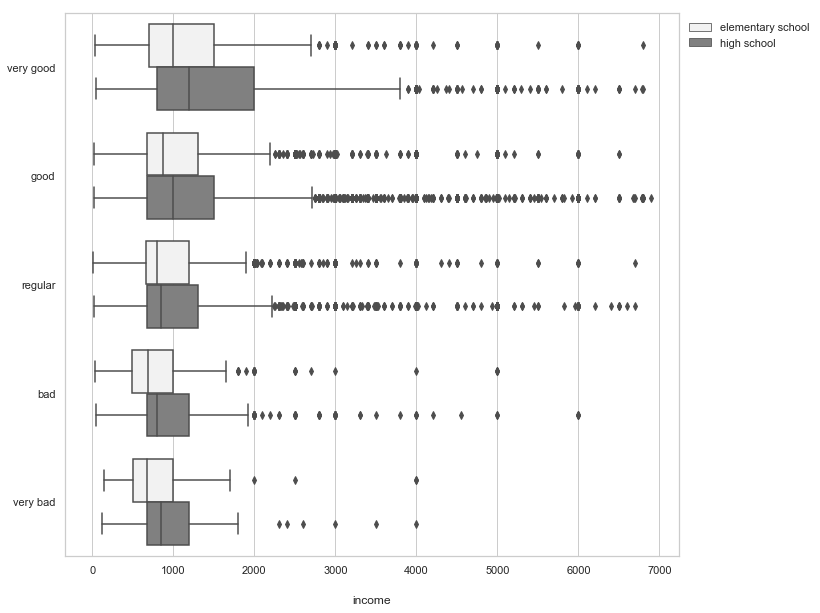

In [26]:
plt.figure(figsize=(11, 10))
sns.boxplot('rendimento', 'percepcao', hue='escolaridade', color = 'gray',
            data=pns4.query('rendimento < 7000'))
plt.xlabel('income', labelpad = 20)
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('')
plt.savefig('imagens-ingles/boxplot.png', bbox_inches='tight');